# 02 Principal Component Analysis Example with "breast_cancer" Dataset

### Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import dataset

In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
raw_data = load_breast_cancer()

In [28]:
raw_data_frame = pd.DataFrame(raw_data['data'], columns = raw_data['feature_names'])

In [29]:
raw_data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Standardize the data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
data_scaler = StandardScaler()

In [32]:
data_scaler.fit(raw_data_frame)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_data_frame = data_scaler.transform(raw_data_frame)

### Perform the principal component analysis transformation

In [34]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components = 2)

In [60]:
pca.fit(scaled_data_frame)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)

print(scaled_data_frame.shape)

(569, 2)
(569, 30)


In [62]:
component_df = pd.DataFrame(data= x_pca, columns=["first_component", "second_component"])
component_df

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


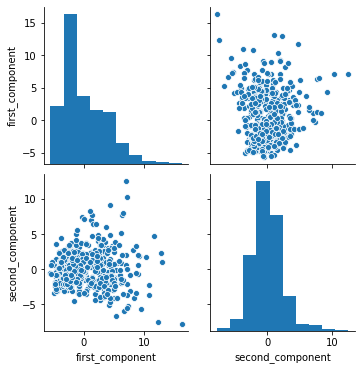

In [63]:
sns.pairplot(component_df)

In [64]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

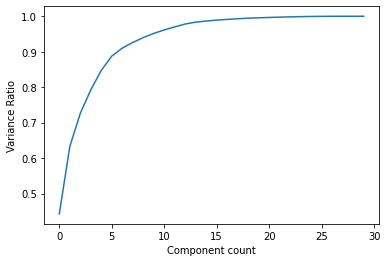

In [65]:
pca = PCA().fit(scaled_data_frame)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

### Visualize the principal components

Text(0, 0.5, 'Second Principal Component')

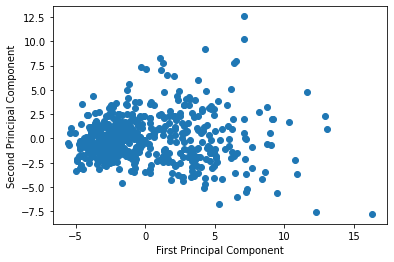

In [66]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Visualize the principal components with a color scheme

Text(0, 0.5, 'Second Principal Component')

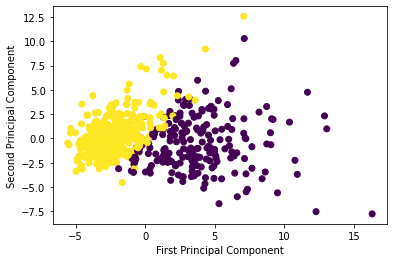

In [67]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=raw_data['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Investigating at the principal components

In [69]:
pca.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

<AxesSubplot:>

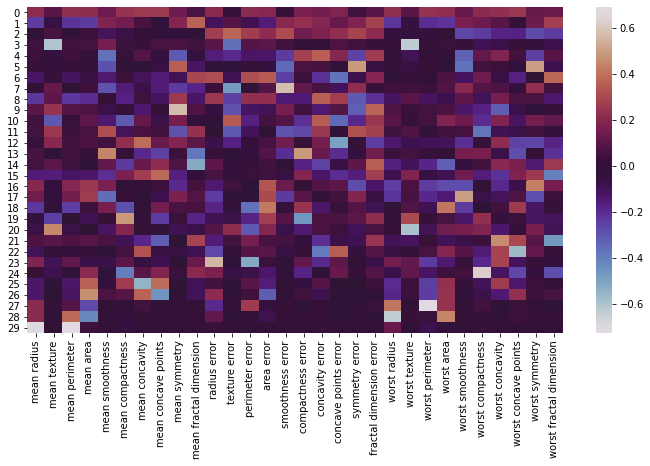

In [70]:
map= pd.DataFrame(pca.components_,columns=raw_data['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')